In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import expon, kstest
import numpy as np

In [2]:
df = pd.read_csv('..\data\data.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_22104\1175757797.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\data\data.csv')


# Feature Engineering

In [3]:
CLV_bins = [0,2000, 4000, 6000, 8000, 10000, 20000, 30000, 50000,90000]
value_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8]

income_bins = [ -1,15000, 30000, 45000, 60000, 75000, 100000]
income_labels = [0,1,2,3,4,5]

premium_bins = [60, 70, 80, 100, 150, 200, 250, 300]
premium_labels = [0,1,2,3,4,5,6]

claim_bins = [0, 150, 300, 450, 600, 750, 1000, 1200, 1400, 1800, 3000]
claim_labels = [0,1,2,3,4,5,6,7,8,9]

# Apply binning to the respective variables
df['CLV Category'] = pd.cut(df['Customer Lifetime Value'], bins=CLV_bins, labels=value_labels)
df['Income Category'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)
df['Monthly Premium Category'] = pd.cut(df['Monthly Premium Auto'], bins=premium_bins, labels=premium_labels)
df['Total Claim Amount Category'] = pd.cut(df['Total Claim Amount'], bins=claim_bins, labels=claim_labels)


In [4]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,CLV Category,Income Category,Monthly Premium Category,Total Claim Amount Category
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,1,3,0,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,3,0,2,6
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,5,3,3,3
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,3,0,3,3
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,1,2,1,0


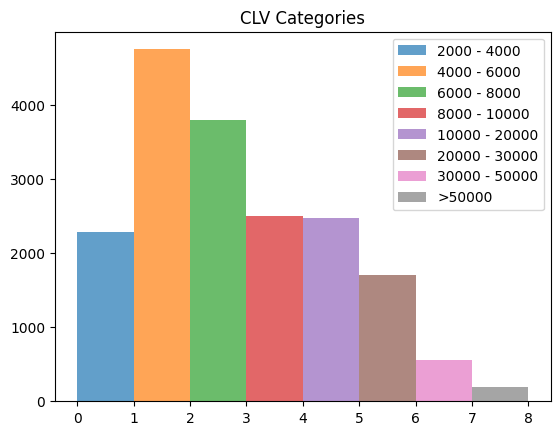

In [5]:
label_clv = ['2000 - 4000', '4000 - 6000', '6000 - 8000', '8000 - 10000', '10000 - 20000', '20000 - 30000', '30000 - 50000', '>50000']
value_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8]
CLV_bins = [0,2000, 4000, 6000, 8000, 10000, 20000, 30000, 50000,90000]
for i in range(len(value_labels)-1):
    plt.hist(df['CLV Category'], bins=value_labels[i:i+2], alpha=0.7, label=label_clv[i])
plt.legend()
plt.title("CLV Categories");


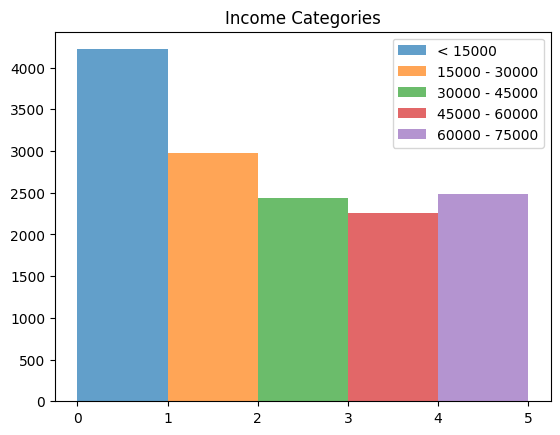

In [8]:
income_labels = [0,1,2,3,4,5]
income_bins = [ -1,15000, 30000, 45000, 60000, 75000, 100000]
labels_income = ['< 15000', '15000 - 30000', '30000 - 45000', '45000 - 60000', '60000 - 75000', '75000 - 100000']
for i in range(len(income_labels)-1):
    plt.hist(df['Income Category'], bins=income_labels[i:i+2], alpha=0.7, label=labels_income[i])
plt.legend()
plt.title("Income Categories");

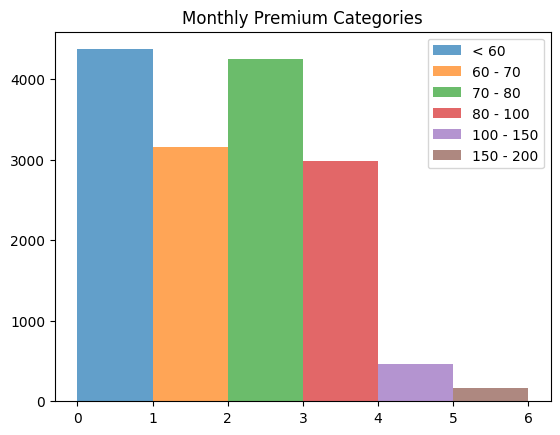

In [9]:
premium_bins = [60, 70, 80, 100, 150, 200, 250, 300]
premium_labels = [0,1,2,3,4,5,6]
labels_premium = ['< 60', '60 - 70', '70 - 80', '80 - 100', '100 - 150', '150 - 200', '200 - 250', '250 - 300']
for i in range(len(premium_labels)-1):
    plt.hist(df['Monthly Premium Category'], bins=premium_labels[i:i+2], alpha=0.7, label=labels_premium[i])
plt.legend()
plt.title("Monthly Premium Categories");

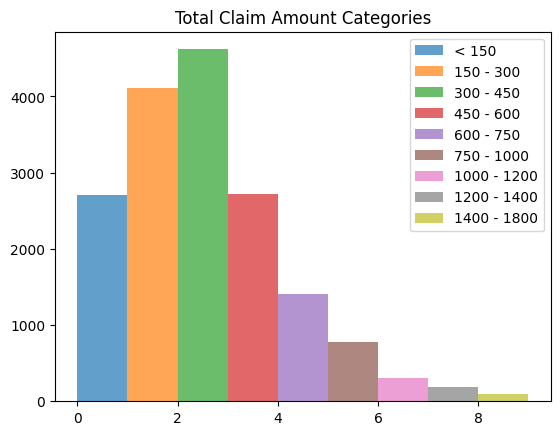

In [10]:
claim_bins = [0, 150, 300, 450, 600, 750, 1000, 1200, 1400, 1800, 3000]
claim_labels = [0,1,2,3,4,5,6,7,8,9]
labels_claim = ['< 150', '150 - 300', '300 - 450', '450 - 600', '600 - 750', '750 - 1000','1000 - 1200', '1200 - 1400', '1400 - 1800', '> 1800']
for i in range(len(claim_labels)-1):
    plt.hist(df['Total Claim Amount Category'], bins=claim_labels[i:i+2], alpha=0.7, label=labels_claim[i])
plt.legend()
plt.title("Total Claim Amount Categories");

### Encoding the Categorical Variables

In [12]:
df_categorical = df.select_dtypes(include=['object'])
df_numerical =  df.select_dtypes(include=['number'])

In [13]:
df_categorical_new = df_categorical.drop('Customer', axis=1)

In [11]:
df_temp = df[['CLV Category', 'Income Category','Monthly Premium Category','Total Claim Amount Category']]
df_temp.head()

,CLV Category,Income Category,Monthly Premium Category,Total Claim Amount Category
0,1,3,0,2
1,3,0,2,6
2,5,3,3,3
3,3,0,3,3
4,1,2,1,0


In [14]:
df_new = pd.concat([df_categorical_new, df_temp], axis = 1)

In [15]:
df_new.head()

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,CLV Category,Income Category,Monthly Premium Category,Total Claim Amount Category
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,1,3,0,2
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,3,0,2,6
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,5,3,3,3
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,3,0,3,3
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,1,2,1,0


In [16]:
categorical = df_new.columns.to_list()
categorical

['State',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'CLV Category',
 'Income Category',
 'Monthly Premium Category',
 'Total Claim Amount Category']

In [17]:
df_encoded = pd.get_dummies(df_new, columns=categorical)
df_encoded.head()

,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,...,Total Claim Amount Category_0,Total Claim Amount Category_1,Total Claim Amount Category_2,Total Claim Amount Category_3,Total Claim Amount Category_4,Total Claim Amount Category_5,Total Claim Amount Category_6,Total Claim Amount Category_7,Total Claim Amount Category_8,Total Claim Amount Category_9
0,False,False,False,False,True,True,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
1,True,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,True,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
3,False,True,False,False,False,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,True,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False


C:\Users\HP\AppData\Local\Temp\ipykernel_22104\1959856631.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for x_label, grp in df_new.groupby('Total Claim Amount Category')


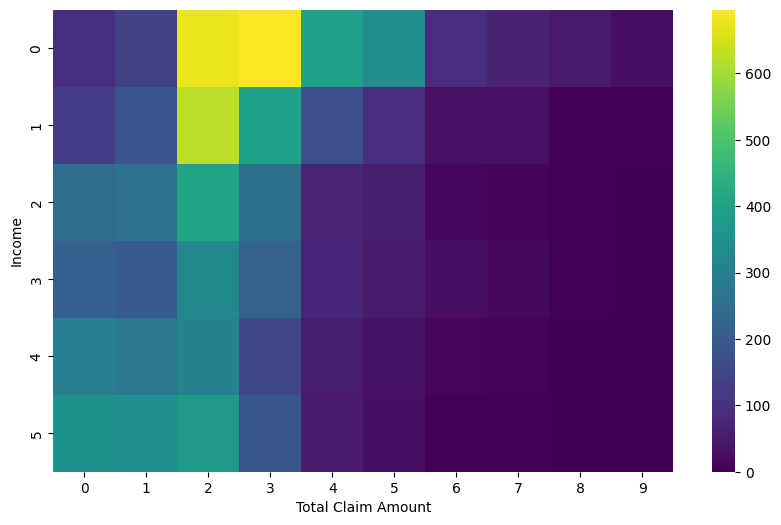

In [18]:

plt.subplots(figsize=(10, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Income Category'].value_counts()
    for x_label, grp in df_new.groupby('Total Claim Amount Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Total Claim Amount')
_ = plt.ylabel('Income')

C:\Users\HP\AppData\Local\Temp\ipykernel_22104\3421201945.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for x_label, grp in df_new.groupby('Total Claim Amount Category')


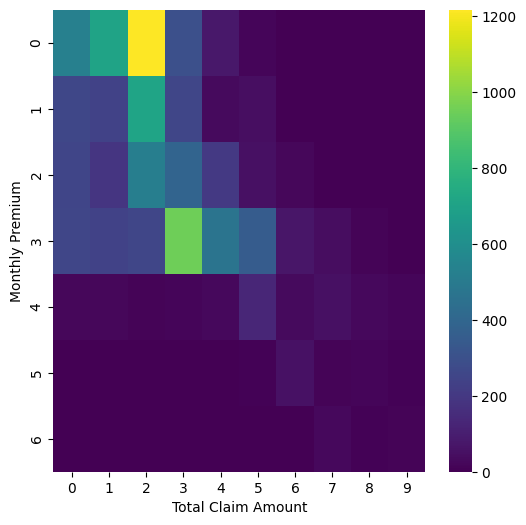

In [19]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Monthly Premium Category'].value_counts()
    for x_label, grp in df_new.groupby('Total Claim Amount Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Total Claim Amount')
_ = plt.ylabel('Monthly Premium')

C:\Users\HP\AppData\Local\Temp\ipykernel_22104\1184555359.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for x_label, grp in df_new.groupby('Total Claim Amount Category')


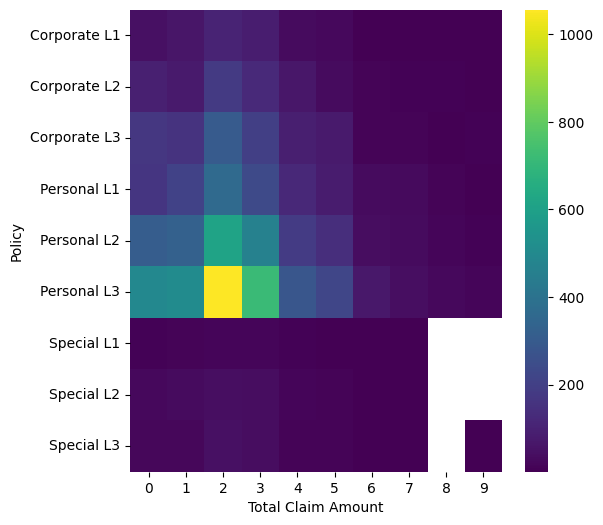

In [20]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Policy'].value_counts()
    for x_label, grp in df_new.groupby('Total Claim Amount Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Total Claim Amount')
_ = plt.ylabel('Policy')

C:\Users\HP\AppData\Local\Temp\ipykernel_22104\3576776054.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for x_label, grp in df_new.groupby('Total Claim Amount Category')


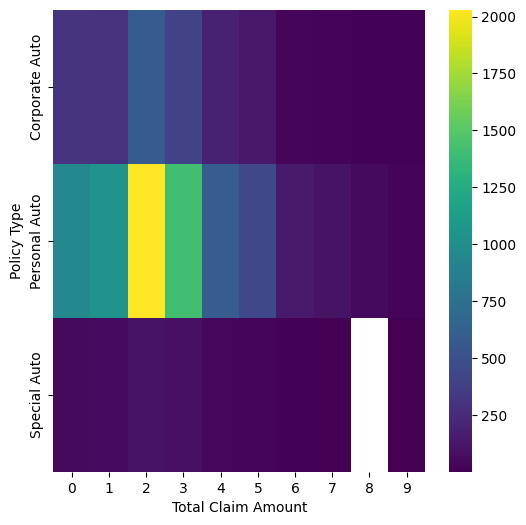

In [21]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Policy Type'].value_counts()
    for x_label, grp in df_new.groupby('Total Claim Amount Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Total Claim Amount')
_ = plt.ylabel('Policy Type')

C:\Users\HP\AppData\Local\Temp\ipykernel_22104\3535530179.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for x_label, grp in df_new.groupby('Monthly Premium Category')


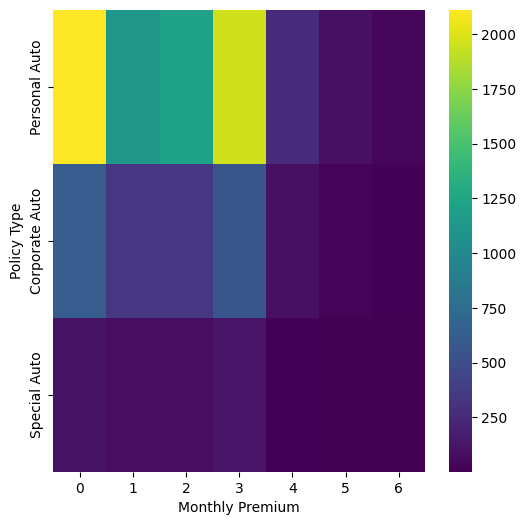

In [22]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Policy Type'].value_counts()
    for x_label, grp in df_new.groupby('Monthly Premium Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Monthly Premium')
_ = plt.ylabel('Policy Type')

C:\Users\HP\AppData\Local\Temp\ipykernel_22104\3918625317.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for x_label, grp in df_new.groupby('Monthly Premium Category')


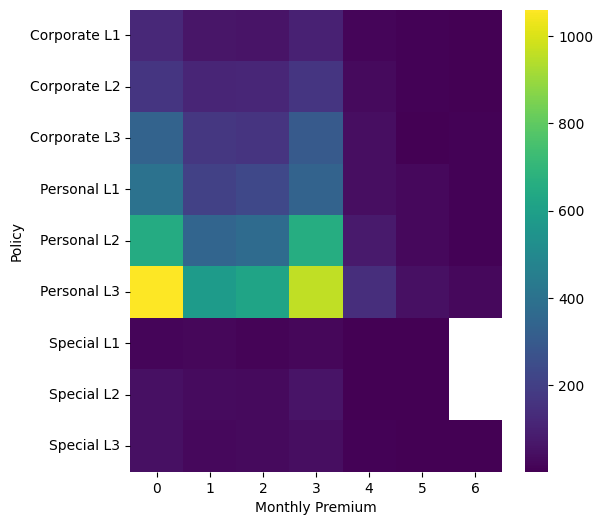

In [23]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Policy'].value_counts()
    for x_label, grp in df_new.groupby('Monthly Premium Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Monthly Premium')
_ = plt.ylabel('Policy')

C:\Users\HP\AppData\Local\Temp\ipykernel_22104\3987771172.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for x_label, grp in df_new.groupby('Monthly Premium Category')


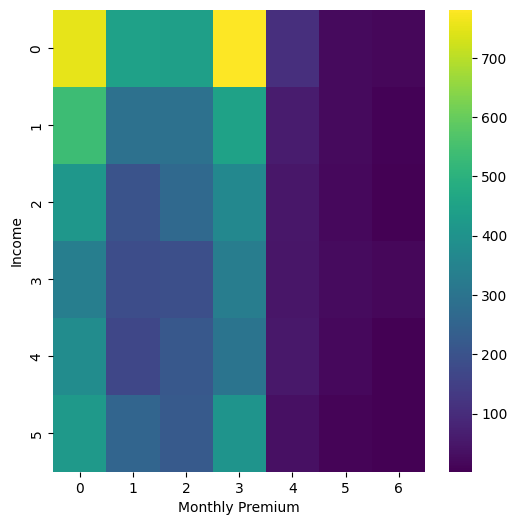

In [24]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Income Category'].value_counts()
    for x_label, grp in df_new.groupby('Monthly Premium Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Monthly Premium')
_ = plt.ylabel('Income')

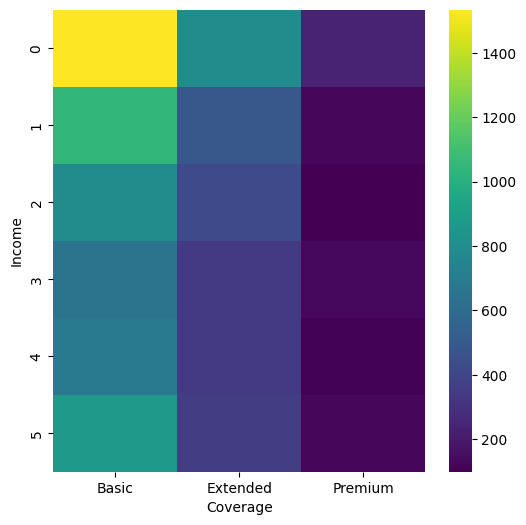

In [25]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Income Category'].value_counts()
    for x_label, grp in df_new.groupby('Coverage')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Coverage')
_ = plt.ylabel('Income')

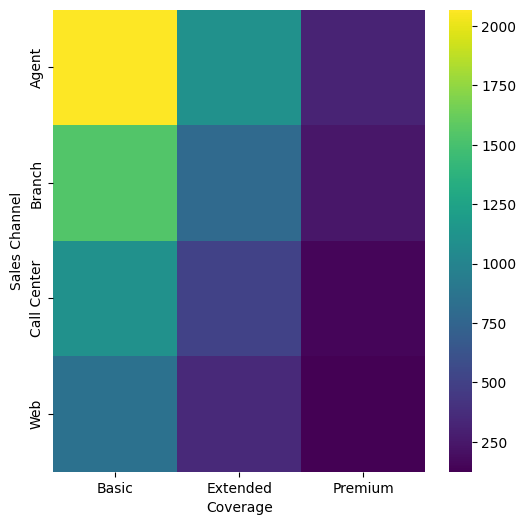

In [26]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Sales Channel'].value_counts()
    for x_label, grp in df_new.groupby('Coverage')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Coverage')
_ = plt.ylabel('Sales Channel')

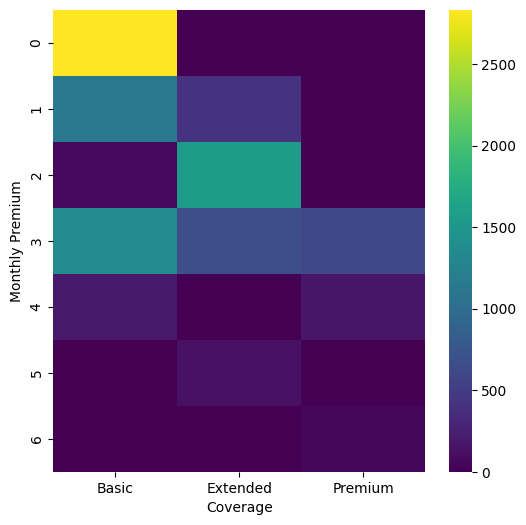

In [27]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Monthly Premium Category'].value_counts()
    for x_label, grp in df_new.groupby('Coverage')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Coverage')
_ = plt.ylabel('Monthly Premium')

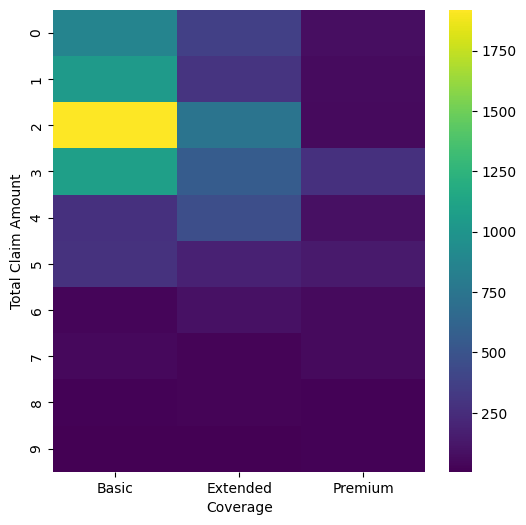

In [28]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Total Claim Amount Category'].value_counts()
    for x_label, grp in df_new.groupby('Coverage')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Coverage')

_ = plt.ylabel('Total Claim Amount')